In [7]:
cd ..

/Users/kosta/github-tests/fake_news


In [8]:
cd Data

/Users/kosta/github-tests/fake_news/Data


In [12]:
cd pickled_data

/Users/kosta/github-tests/fake_news/Data/pickled_data


In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [71]:
ls

data_dtm.pkl      df_clean.pkl      df_pre_steem.pkl  df_real.pkl
df.pkl            df_fake.pkl       df_raw.pkl


In [72]:
df = pd.read_pickle("df_pre_steem.pkl")

In [73]:
df.iloc[8001,1]

'mayor charlotte north carolina monday back ordinance expand anti discrimination gay people city also sparked controversial state law republican north legislature said statement late sunday would support law voided city ordinance charlotte made first move north republican governor blame charlotte state measure drawn rebuke major sports since march state law known house bill people use publicly correspond gender birth certificate local protecting lesbian gay bisexual people discrimination spokesman governor pat told local media last week would call special session consider repeal charlotte ordinance charlotte mayor jennifer democrat said city reconsider ordinance council meeting monday night appreciate state wanting find solution facing applaud governor state overturn state time without action city charlotte said statement repeal state law mounted last week national collegiate athletic association atlantic coast conference total championship sporting north carolina protest previously na

In [74]:
df["length_of_text"] = [len(text.split()) for text in df["text"]]

In [75]:
df = df.reset_index(drop=True)

In [76]:
df = df.loc[df["length_of_text"] > 50]

In [77]:
df = df.reset_index(drop = True)

In [78]:
df

,title,text,subject,date,status,length_of_text
0,"as u.s. budget fight looms, republicans flip t...",head conservative republican faction us congre...,politicsNews,2017-12-31,1,340
1,u.s. military to accept transgender recruits o...,people first time enlist us military starting ...,politicsNews,2017-12-29,1,263
2,senior u.s. republican senator: 'let mr. muell...,special counsel investigation links russia pre...,politicsNews,2017-12-31,1,209
3,fbi russia probe helped by australian diplomat...,trump campaign adviser george told australian ...,politicsNews,2017-12-30,1,164
4,trump wants postal service to charge 'much mor...,president donald trump us postal service frida...,politicsNews,2017-12-29,1,367
...,...,...,...,...,...,...
32434,the white house and the theatrics of ‘gun cont...,century wire world stage men merely one man ti...,US_News,2016-01-07,0,525
32435,activists or terrorists? how media controls an...,randy century majority media surrounding wildl...,US_News,2016-01-07,0,1757
32436,"boiler room – no surrender, no retreat, heads ...",tune alternate current radio network another l...,US_News,2016-01-06,0,86
32437,federal showdown looms in oregon after blm abu...,century wire new front long battle america sma...,US_News,2016-01-04,0,1339


**Next steps:**

    2.1 Length of articles
    
    2.2 Length & complexity of words
    
    2.3 Most frequent words
    
    2.4 Most frequent double words (bi-grams)
    
    2.5 Most frequent triple words (tri-grams)
    
    2.6 Statement Analysis with TextBlob (Santiment & Subjectivity)

### 2.1 Length of articles (words and characters)

In [79]:
df_real = df.loc[df["status"] == 1]
df_fake = df.loc[df["status"] == 0]

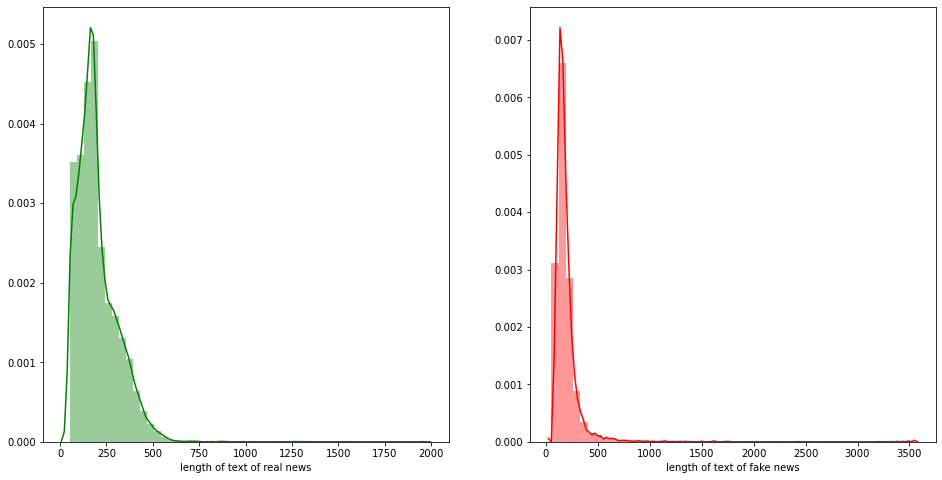

In [80]:
fig, axs = plt.subplots(ncols=2, figsize = (16,8))
x = pd.Series(df_real["length_of_text"], name="length of text of real news")
y = pd.Series(df_fake["length_of_text"], name="length of text of fake news")
ax1 = sns.distplot(x, color='green', ax=axs[0])
ax2 = sns.distplot(y, color='red', ax=axs[1])

In [81]:
df_real["length_of_text"].mean() - df_fake["length_of_text"].mean()

11.458788042185063

On average real news are a bit longer (11.5 words) than fake 

In [82]:
df_real_raw = pd.read_pickle("df_real.pkl")

In [83]:
df_fake_raw = pd.read_pickle("df_fake.pkl")

In [84]:
df_real_raw["length_of_text"] = [len(text.split()) for text in df_real_raw["text"]]

In [85]:
df_fake_raw["length_of_text"] = [len(text.split()) for text in df_fake_raw["text"]]

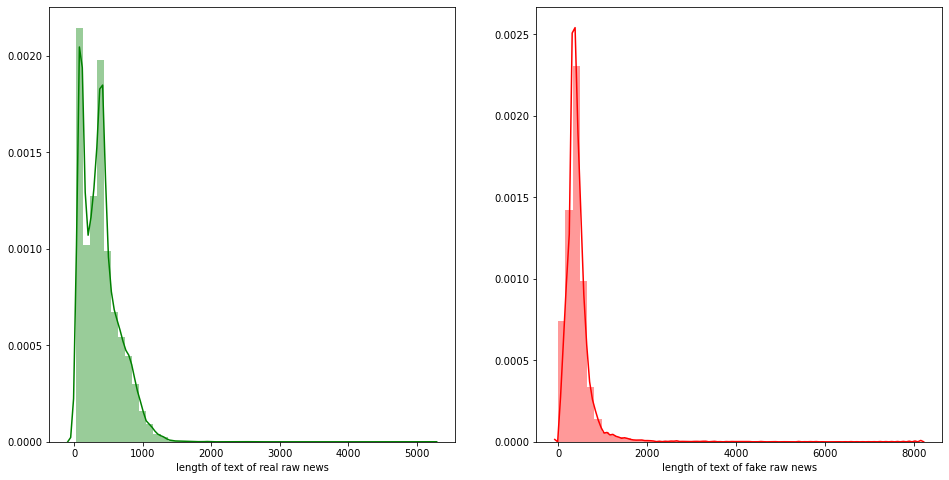

In [86]:
fig, axs = plt.subplots(ncols=2, figsize = (16,8))
x = pd.Series(df_real_raw["length_of_text"], name="length of text of real raw news")
y = pd.Series(df_fake_raw["length_of_text"], name="length of text of fake raw news")
ax1 = sns.distplot(x, color='green', ax=axs[0])
ax2 = sns.distplot(y, color='red', ax=axs[1])

In [87]:
df_real_raw["length_of_text"].mean() - df_fake_raw["length_of_text"].mean()

-42.107299700415695

Raw data shows that fake news contain 42 more words than real news on average, however, after removing non-english and stop words, real news have 11.5 more words than fake news. Meaning that on average, fake news contain more stop words than real ones.

Number of characters?

In [88]:
df_real['text'].str.len().mean()

1431.4543977860667

In [89]:
df_fake['text'].str.len().mean()

1310.626224947841

Fake news have 120 characters less on average than real

### 2.2 Length & complexity of words

In [48]:
df

,title,text,subject,date,status,length_of_text
0,"as u.s. budget fight looms, republicans flip t...",head conserv republican faction us congress mo...,politicsNews,2017-12-31,1,336
1,u.s. military to accept transgender recruits o...,peopl first time enlist us militari start mond...,politicsNews,2017-12-29,1,254
2,senior u.s. republican senator: 'let mr. muell...,special counsel investig link russia presid el...,politicsNews,2017-12-31,1,209
3,fbi russia probe helped by australian diplomat...,trump campaign advis georg told australian dip...,politicsNews,2017-12-30,1,159
4,trump wants postal service to charge 'much mor...,presid donald trump us postal servic friday ch...,politicsNews,2017-12-29,1,360
...,...,...,...,...,...,...
32286,the white house and the theatrics of ‘gun cont...,st centuri wire world stage men mere one man t...,US_News,2016-01-07,0,503
32287,activists or terrorists? how media controls an...,randi st centuri major media surround wildlif ...,US_News,2016-01-07,0,1708
32288,"boiler room – no surrender, no retreat, heads ...",tune altern current radio network anoth live b...,US_News,2016-01-06,0,78
32289,federal showdown looms in oregon after blm abu...,st centuri wire new front long battl america s...,US_News,2016-01-04,0,1335


In [152]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
data_cv = cv.fit_transform(df.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df.index
data_dtm

,aa,aardvark,aaron,ab,aba,aback,abacus,abandon,abandoned,abandonment,...,zonation,zone,zoned,zoning,zoo,zoom,zorro,zucchini,zulu,zygote
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32436,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32437,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
#data_dtm.to_pickle("data_dtm.pkl")

In [91]:
data_dtm.max().sort_values(ascending=False).head(10)

sentenc      122
counti       119
distribut    111
cocain        98
possess       91
intent        80
target        79
group         76
presid        75
first         74
dtype: int64

In [97]:
df_pre_steem = pd.read_pickle("df_pre_steem.pkl")

In [99]:
data_cv = cv.fit_transform(df_pre_steem.text)
df_pre_steem_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
df_pre_steem_dtm.index = df_pre_steem.index
df_pre_steem_dtm

,aa,aardvark,aaron,ab,aba,aback,abacus,abandon,abandoned,abandonment,...,zonation,zone,zoned,zoning,zoo,zoom,zorro,zucchini,zulu,zygote
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22700,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
22701,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
list_of_words = list(df_pre_steem_dtm.columns.values)

In [114]:
length_of_words = [len(i) for i in list_of_words]

In [118]:
sum(length_of_words) / len(length_of_words)

7.589713000204513

In [123]:
data_cv = cv.fit_transform(df_real.text)
df_real_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
df_real_dtm.index = df_real.index

In [126]:
list_of_words_real = list(df_real_dtm.columns.values)
length_of_words_real = [len(i) for i in list_of_words_real]
sum(length_of_words_real) / len(length_of_words_real)

7.476297372243496

In [127]:
data_cv = cv.fit_transform(df_fake.text)
df_fake_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
df_fake_dtm.index = df_fake.index

In [132]:
list_of_words_fake = list(df_fake_dtm.columns.values)
length_of_words_fake = [len(i) for i in list_of_words_fake]
sum(length_of_words_fake) / len(length_of_words_fake)

7.570877794220734

Length of words is almost the same!

### 2.3 Most frequent words

In [133]:
df_pre_steem_dtm.max().sort_values(ascending=False).head(10)

sentence      122
county        119
distribute     98
cocaine        98
intent         80
target         78
group          76
president      74
first          74
source         72
dtype: int64

The most common words are "sentence" (122), "county" (119), "distribute" (111), "cocaine" (98), and possess (91)

In [134]:
df_real_dtm.max().sort_values(ascending=False).head(10)

president    53
kim          51
would        48
tax          44
trump        41
police       38
north        37
percent      37
cuba         37
coal         36
dtype: int64

In [206]:
df_real["text"].str.contains('said').value_counts()[True]

15943

The most common words of **REAL** news are "president" (53), "kim" (51), "would" (48), "tax" (44), and "trump" (41)

In [136]:
df_fake_dtm.max().sort_values(ascending=False).head(10)

sentence      122
county        119
cocaine        98
distribute     98
intent         80
target         78
group          76
president      74
first          74
source         72
dtype: int64

In [204]:
df_fake["text"].str.contains('said').value_counts()[True]

9527

In [205]:
df_real["text"].str.contains('said').value_counts()[True]

15943

In [208]:
df_fake["text"].count()

15817

In [210]:
df_real["text"].count()

16622

In [211]:
9527 / 15817

0.6023266106088386

In [213]:
15943 / 16622

0.9591505234027193

The most common words of **FAKE** news are "sentence" (122), "county" (119), "cocaine" (98), "distribute" (98), and "intent" (80)

real news use the word "said" more often! In fake news it is in 60% of the news articles, while in 96% of the real ones.

In [334]:
df.iloc[2,1]

'special counsel investigation links russia president election campaign continue without interference despite trump administration allies republican shut prominent republican senator said sunday lindsey graham senate armed judiciary said department justice special counsel robert needs carry russia investigation without political interference investigation go forward investigation without political influence graham said face nation news program need let mr job think right guy right time question russia may election campaign may links effort white house since trump took office january sign trump second year power despite rhetoric trump allies recent team bias republican president trump undercut interview last week new york times said going fair role election question possible links trump campaign focus multiple washington three senate house investigating well whose team may took probe us federal bureau investigation several trump campaign administration investigation trump allies deny co

In [170]:
def unite_text(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = unite_text(df.text)
corpus_real = unite_text(df_real.text)
corpus_fake = unite_text(df_fake.text)

Real news have 340774 more words than fake, thus will analyza only fake

In [153]:
def get_ngrams(corpus, n, g):
    v = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = v.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in v.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [159]:
most_common_words = get_ngrams(df.text, 5, 1)

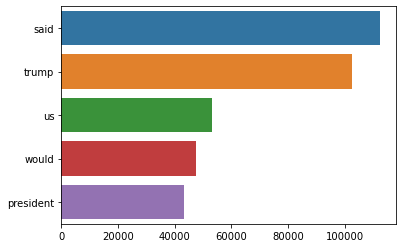

In [161]:
most_common_words = dict(most_common_words)
sns.barplot(x=list(most_common_words.values()),y=list(most_common_words.keys()))

### Fake

In [197]:
most_common_fake_words = get_ngrams(df_fake.text, 5, 1)

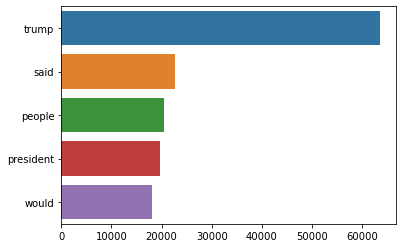

In [203]:
most_common_fake_words = dict(most_common_fake_words)
sns.barplot(x=list(most_common_fake_words.values()),y=list(most_common_fake_words.keys()))

### 2.4 Most frequent double words (bi-grams)

In [164]:
most_common_double = get_ngrams(df.text, 5, 2)

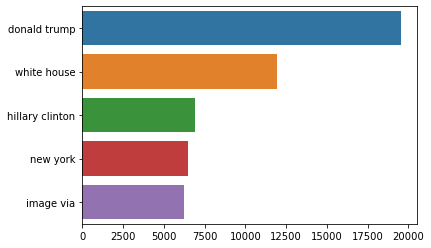

In [165]:
most_common_double = dict(most_common_double)
sns.barplot(x=list(most_common_double.values()),y=list(most_common_double.keys()))

### 2.5 Most frequent triple words (tri-grams) 

In [168]:
most_common_triple = get_ngrams(df.text, 5, 3)

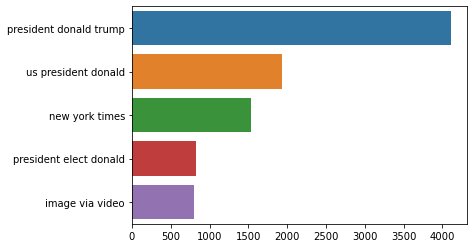

In [169]:
most_common_triple = dict(most_common_triple)
sns.barplot(x=list(most_common_triple.values()),y=list(most_common_triple.keys()))

### 2.6 Statement Analysis with TextBlob (Santiment & Subjectivity)

In [218]:
df_fake

,title,text,subject,date,status,length_of_text
16622,donald trump sends out embarrassing new year’...,donald trump wish happy new year leave instead...,News,2017-12-31,0,190
16623,drunk bragging trump staffer started russian ...,house intelligence committee chairman going ba...,News,2017-12-31,0,128
16624,sheriff david clarke becomes an internet joke...,friday revealed former sheriff david considere...,News,2017-12-30,0,220
16625,trump is so obsessed he even has obama’s name...,christmas day donald trump would back work fol...,News,2017-12-29,0,164
16626,pope francis just called out donald trump dur...,pope francis used annual christmas day message...,News,2017-12-25,0,171
...,...,...,...,...,...,...
32434,the white house and the theatrics of ‘gun cont...,century wire world stage men merely one man ti...,US_News,2016-01-07,0,525
32435,activists or terrorists? how media controls an...,randy century majority media surrounding wildl...,US_News,2016-01-07,0,1757
32436,"boiler room – no surrender, no retreat, heads ...",tune alternate current radio network another l...,US_News,2016-01-06,0,86
32437,federal showdown looms in oregon after blm abu...,century wire new front long battle america sma...,US_News,2016-01-04,0,1339


In [220]:
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [221]:
df_fake['polarity'] = df_fake['text'].apply(pol)
df_fake['subjectivity'] = df_fake['text'].apply(sub)

<ipython-input-221-bd28c2886a48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake['polarity'] = df_fake['text'].apply(pol)
<ipython-input-221-bd28c2886a48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake['subjectivity'] = df_fake['text'].apply(sub)


In [222]:
df_real['polarity'] = df_real['text'].apply(pol)
df_real['subjectivity'] = df_real['text'].apply(sub)

<ipython-input-222-f2180c581a56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['polarity'] = df_real['text'].apply(pol)
<ipython-input-222-f2180c581a56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['subjectivity'] = df_real['text'].apply(sub)


In [352]:
df_real['polarity'].mean()

0.0509558574958813

In [353]:
df_fake['polarity'].mean()

0.049323905697279555

There is quite a big similarity in the average polarity of fake and real news. No significant difference.

In [354]:
df_real['subjectivity'].mean()

0.3561389677929123

In [355]:
df_fake['subjectivity'].mean()

0.44410833001325944

In [335]:
0.44410833001325944 - 0.3561389677929123

0.08796936222034712

As expected, real news are closer to 0 and thus classified as more objective (fact-based) than fake news. However, this difference is not big

**Next steps:**

    2.1 Machine Learning to predict fake vs real news
    
    2.2 Improve ML accuracy based on method selection
    
    2.3 Improve ML accuracy based on database cleaning
    
    2.4 Improve ML accuracy based on feature creation
    
    2.5 Improve ML accuracy based on feature selection
    
    2.6 Simple visualization of accuracy and results
    
    2.7 Tableau visualizations

In [248]:
df_clean = pd.read_pickle("df_clean.pkl")

In [249]:
df_clean

,title,text,subject,date,status
0,"as u.s. budget fight looms, republicans flip t...",head conserv republican faction us congress mo...,politicsNews,2017-12-31,1
1,u.s. military to accept transgender recruits o...,peopl first time enlist us militari start mond...,politicsNews,2017-12-29,1
2,senior u.s. republican senator: 'let mr. muell...,special counsel investig link russia presid el...,politicsNews,2017-12-31,1
3,fbi russia probe helped by australian diplomat...,trump campaign advis georg told australian dip...,politicsNews,2017-12-30,1
4,trump wants postal service to charge 'much mor...,presid donald trump us postal servic friday ch...,politicsNews,2017-12-29,1
...,...,...,...,...,...
22698,the white house and the theatrics of ‘gun cont...,st centuri wire world stage men mere one man t...,US_News,2016-01-07,0
22699,activists or terrorists? how media controls an...,randi st centuri major media surround wildlif ...,US_News,2016-01-07,0
22700,"boiler room – no surrender, no retreat, heads ...",tune altern current radio network anoth live b...,US_News,2016-01-06,0
22701,federal showdown looms in oregon after blm abu...,st centuri wire new front long battl america s...,US_News,2016-01-04,0


In [250]:
df_clean["length_of_text"] = [len(text.split()) for text in df_clean["text"]]

In [251]:
df_clean = df_clean.loc[df_clean["length_of_text"] > 50]

In [253]:
df_clean = df_clean.reset_index(drop=True)

In [254]:
df_ml = df[['text', 'status']]

In [256]:
#df_ml.to_pickle("df_ml.pkl")

In [259]:
df_ml

,text,status
0,head conservative republican faction us congre...,1
1,people first time enlist us military starting ...,1
2,special counsel investigation links russia pre...,1
3,trump campaign adviser george told australian ...,1
4,president donald trump us postal service frida...,1
...,...,...
32434,century wire world stage men merely one man ti...,0
32435,randy century majority media surrounding wildl...,0
32436,tune alternate current radio network another l...,0
32437,century wire new front long battle america sma...,0


In [261]:
df_ml["status"].value_counts()

1    16622
0    15817
Name: status, dtype: int64

In [265]:
15817 / (16622 + 15817)

0.48759209593390673

48.7% vs 51.3% is pretty balanced.

In [367]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from nltk.tokenize import RegexpTokenizer
from sklearn.linear_model import LogisticRegression

In [320]:
X_train, X_test, y_train, y_test = train_test_split(df_ml['text'], df_ml['status'], test_size=0.3, random_state=42)
print(f'Train dimensions: {X_train.shape, y_train.shape}')
print(f'Test dimensions: {X_test.shape, y_test.shape}')
# Check out target distribution
print(y_train.value_counts())
print(y_test.value_counts())

Train dimensions: ((22707,), (22707,))
Test dimensions: ((9732,), (9732,))
1    11639
0    11068
Name: status, dtype: int64
1    4983
0    4749
Name: status, dtype: int64


In [321]:
def token_text(text):
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)
    return tokens

In [322]:
# Create an instance of TfidfVectorizer
vectoriser = TfidfVectorizer(analyzer=token_text)
# Fit to the data and transform to feature matrix
X_train_tfidf = vectoriser.fit_transform(X_train)
X_train_tfidf.shape

(22707, 27340)

In [340]:
sgd_clf = SGDClassifier(random_state=42)
sgf_clf_scores = cross_val_score(sgd_clf, X_train_tfidf, y_train, cv=5)
print(sgf_clf_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (sgf_clf_scores.mean(), sgf_clf_scores.std() * 2))

[0.97798327 0.9764421  0.97951993 0.97555604 0.97687734]
Accuracy: 0.98 (+/- 0.00)


In [341]:
cross_val_score(sgd_clf, X_train_tfidf, y_train, cv=5, scoring='accuracy')

array([0.97798327, 0.9764421 , 0.97951993, 0.97555604, 0.97687734])

In [342]:
sgf_clf_pred = cross_val_predict(sgd_clf, X_train_tfidf, y_train, cv=5)
print(confusion_matrix(y_train, sgf_clf_pred))

[[10723   345]
 [  171 11468]]


In [343]:
grid = {'fit_intercept': [True,False],
        'early_stopping': [True, False],
        'loss' : ['hinge', 'log', 'squared_hinge'],
        'penalty' : ['l2', 'l1', 'none']}
search = GridSearchCV(estimator=sgd_clf, param_grid=grid, cv=5)
search.fit(X_train_tfidf, y_train)
search.best_params_

/Users/kosta/opt/miniconda3/envs/Boogie_Woogie/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


{'early_stopping': True,
 'fit_intercept': True,
 'loss': 'hinge',
 'penalty': 'l2'}

In [344]:
grid_sgd_clf_scores = cross_val_score(search.best_estimator_, X_train_tfidf, y_train, cv=5)
print(grid_sgd_clf_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (grid_sgd_clf_scores.mean(), grid_sgd_clf_scores.std() * 2))

[0.9784236  0.97490092 0.98084122 0.97687734 0.97621669]
Accuracy: 0.98 (+/- 0.00)


In [345]:
pipe = Pipeline([('vectoriser', vectoriser),
                 ('classifier', search.best_estimator_)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectoriser',
                 TfidfVectorizer(analyzer=<function token_text at 0x23727f820>)),
                ('classifier',
                 SGDClassifier(early_stopping=True, random_state=42))])

In [346]:
y_test_pred = pipe.predict(X_test)
print("Accuracy: %0.2f" % (accuracy_score(y_test, y_test_pred)))
print(confusion_matrix(y_test, y_test_pred))

Accuracy: 0.98
[[4591  158]
 [  65 4918]]


In [395]:
df_ml

,text,status
0,head conservative republican faction us congre...,1
1,people first time enlist us military starting ...,1
2,special counsel investigation links russia pre...,1
3,trump campaign adviser george told australian ...,1
4,president donald trump us postal service frida...,1
...,...,...
32434,century wire world stage men merely one man ti...,0
32435,randy century majority media surrounding wildl...,0
32436,tune alternate current radio network another l...,0
32437,century wire new front long battle america sma...,0


In [396]:
X_train, X_test, y_train, y_test = train_test_split(df_ml['text'], 
                                                    df_ml['status'], 
                                                    random_state=42)

In [397]:
vect = CountVectorizer().fit(X_train)

In [398]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<24329x27714 sparse matrix of type '<class 'numpy.int64'>'
	with 3250767 stored elements in Compressed Sparse Row format>

In [399]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

/Users/kosta/opt/miniconda3/envs/Boogie_Woogie/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [400]:
from sklearn.metrics import roc_auc_score

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9767673238067974


In [401]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions, labels=[0, 1]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, predictions, labels=[0, 1]))

[[3833  119]
 [  68 4090]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3952
           1       0.97      0.98      0.98      4158

    accuracy                           0.98      8110
   macro avg       0.98      0.98      0.98      8110
weighted avg       0.98      0.98      0.98      8110



In [402]:
cm = confusion_matrix(y_test, predictions , labels=[0, 1])

Text(0.5, 15.0, 'predictions')

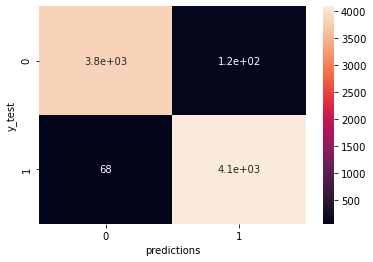

In [403]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax= ax)
ax.set_ylabel('y_test')
ax.set_xlabel('predictions')

In [407]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:20]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-31:-1]]))

Smallest Coefs:
['via' 'rep' 'image' 'wire' 'sen' 'reportedly' 'read' 'entire' 'mr'
 'daily' 'isis' 'revealed' 'actually' 'caller' 'examiner' 'radical'
 'destroy' 'hill' 'hillary' 'story']

Largest Coefs: 
['dont' 'thats' 'didnt' 'accuracy' 'rival' 'theres' 'comment' 'doesnt'
 'wednesday' 'expressed' 'link' 'newspaper' 'tuesday' 'posted' 'said'
 'sap' 'cant' 'overhaul' 'republican' 'nominate' 'wont' 'thursday'
 'mainly' 'weve' 'friday' 'separate' 'region' 'abroad' 'whats' 'crackdown']


In [405]:
df_ml

,text,status
0,head conservative republican faction us congre...,1
1,people first time enlist us military starting ...,1
2,special counsel investigation links russia pre...,1
3,trump campaign adviser george told australian ...,1
4,president donald trump us postal service frida...,1
...,...,...
32434,century wire world stage men merely one man ti...,0
32435,randy century majority media surrounding wildl...,0
32436,tune alternate current radio network another l...,0
32437,century wire new front long battle america sma...,0
